In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing_data.csv")

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
import matplotlib.pyplot as plt

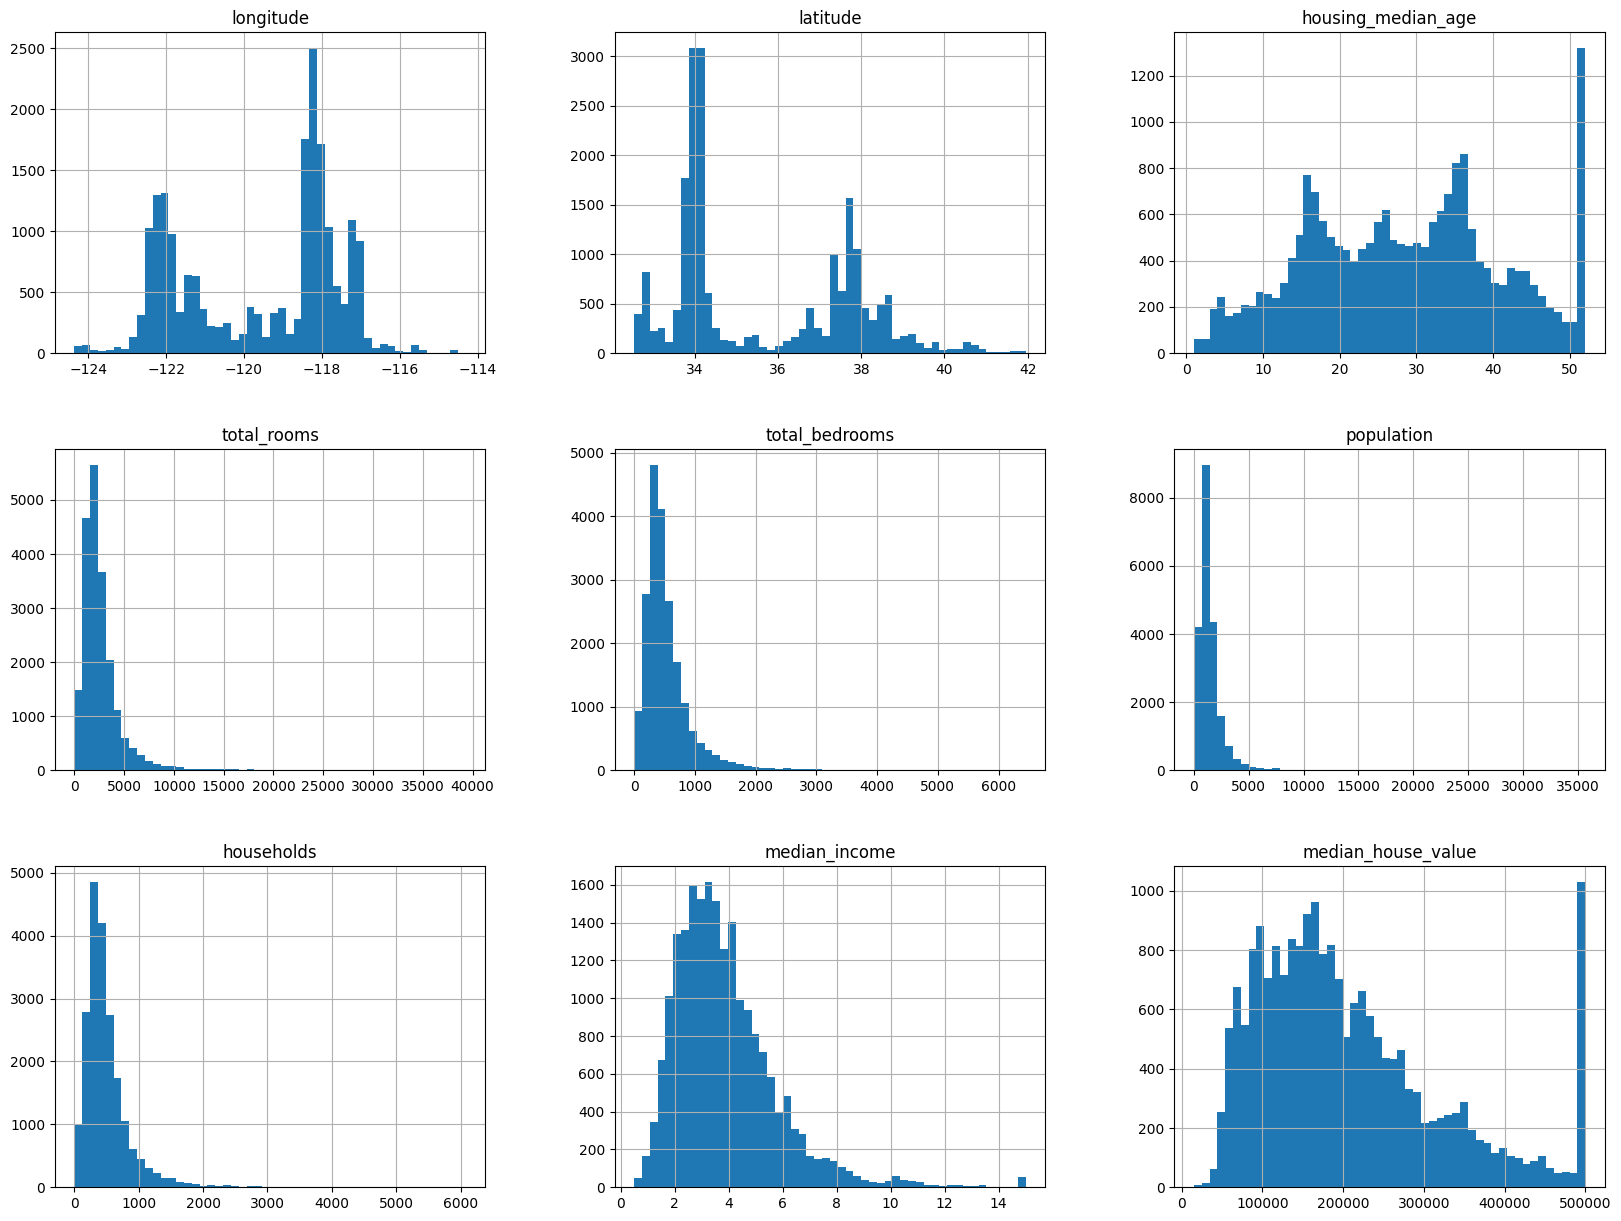

In [8]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Profile Report

In [9]:
from ydata_profiling import ProfileReport

In [10]:
profile = ProfileReport(housing, title="Housing Data Report", explorative=True)


In [11]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 88.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Create a Test Set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [14]:
len(train_set)

16512

In [15]:
len(test_set)

4128

In [16]:
import numpy as np

#  Histogram of income categories

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<Axes: >

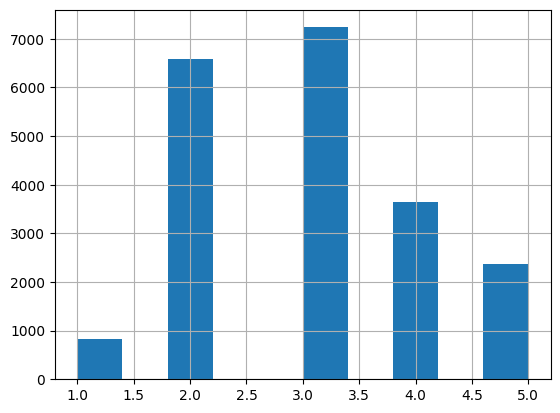

In [18]:
housing["income_cat"].hist()

In [19]:
train_set, test_set = train_test_split(
housing,                    # The dataset to split
test_size=0.2,              # Keep 20% for testing (80% for training)
random_state=42,            # Set random seed for reproducibility
stratify=housing['income_cat']  # Use income categories for stratification
)

# Why We Use `stratify=housing['income_cat']` in Train-Test Split

The `stratify` parameter ensures that the training and test sets maintain the same proportion of different categories as the original dataset. Here’s why this is crucial:

## 1. Avoids Biased Sampling

**Problem:**  
If we split randomly, some categories might get overrepresented or missing in the test set.  

**Example:**  
If 20% of houses are "low-income," random splitting might accidentally exclude most of them.  

**Solution:**  
`stratify` guarantees that 20% of each income group goes to the test set.  

**Ensures fairness** – No group is left out or overrepresented.  

## 2. Better Model Generalization

A model trained on all income groups equally will perform well in real-world scenarios.  

If the test set lacks certain groups, we can’t trust the model’s accuracy.  

**Example:**  
- **Without Stratification** → Test set might have only rich neighborhoods → Model fails for poor areas.  
- **With Stratification** → Test set has rich, middle-class, and poor houses → Model works for everyone.  

## 3. Works for Any Categorical Data

`stratify` is not just for income—it works for:  
- **Medical Data:** Ensuring equal representation of sick/healthy patients.  
- **E-commerce:** Balancing product categories (e.g., electronics, clothes).  
- **Education:** Keeping the same ratio of pass/fail students in test data.  

**Formula:**  
If the original dataset has:  
- 10% Category A  
- 30% Category B  
- 60% Category C  

Then the test set (`test_size=0.2`) will have:  
- 2% A (20% of 10%)  
- 6% B (20% of 30%)  
- 12% C (20% of 60%)  

## 4. When Should You Use `stratify`?

✔ **Classification Problems** (Predicting categories like spam/not spam).  
✔ **Imbalanced Datasets** (Where some categories are rare).  
✔ **Fairness-Critical Applications** (Housing, loans, healthcare).  

**Not needed for:**  
- Regression problems (predicting continuous numbers like temperature).  
- When data is already perfectly balanced.  

In [20]:
train_set['income_cat'].value_counts(normalize=True).sort_index()

income_cat
1    0.039789
2    0.318859
3    0.350594
4    0.176296
5    0.114462
Name: proportion, dtype: float64

In [21]:
housing['income_cat'].value_counts(normalize=True).sort_index()

income_cat
1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: proportion, dtype: float64

In [22]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

In [23]:
housing.drop('income_cat', axis=1, inplace=True) if 'income_cat' in housing.columns else None

# Why Do We Remove the `income_cat` Column?

## 1. It Served Its Purpose
- We only created `income_cat` to **split the data fairly** (like using a measuring cup)
- Now that we have our training/test sets, we **don't need it** for actual modeling

## 2. Avoid Cheating
- If we keep it, the AI might **use income categories to guess prices** (like a student peeking at answer keys)
- We want the AI to learn from **real features** (bedrooms, location) — not artificial labels!

## 3. Keep Data Original
- The `income_cat` column **wasn't in the original dataset**
- We're restoring the data to its **pure form** for exploration

In [24]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [25]:
housing = train_set.copy()

# Why We Use `.copy()` in Pandas

`housing = train_set.copy()` creates a **safe, independent copy** of your training data.

## Key Reasons
1.  **Avoid accidental changes** to the original `train_set`
2.  **Keep original data clean** for final model training
3.  **Prevent Pandas warnings** when modifying data

## Example Comparison
```python
Risky: housing = train_set        # Changes affect original
Safe:   housing = train_set.copy() # Changes stay isolated

# Discover and Visualize the Data to Gain Insights

<Axes: xlabel='longitude', ylabel='latitude'>

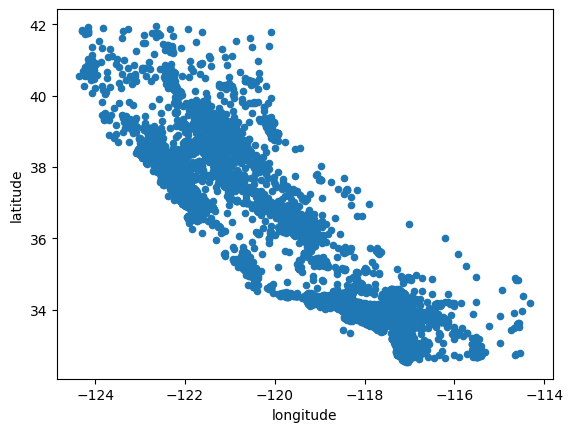

In [26]:
# Visualizing Geographical Data
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

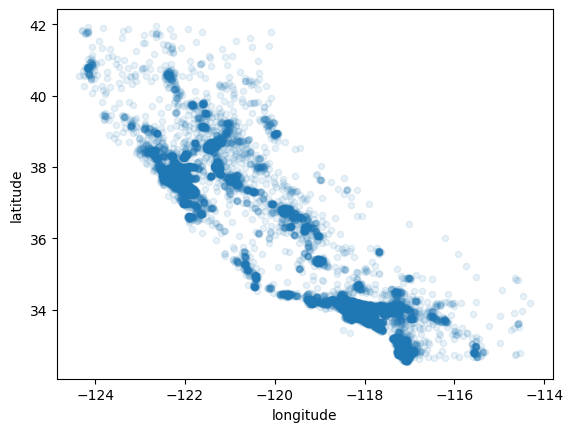

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

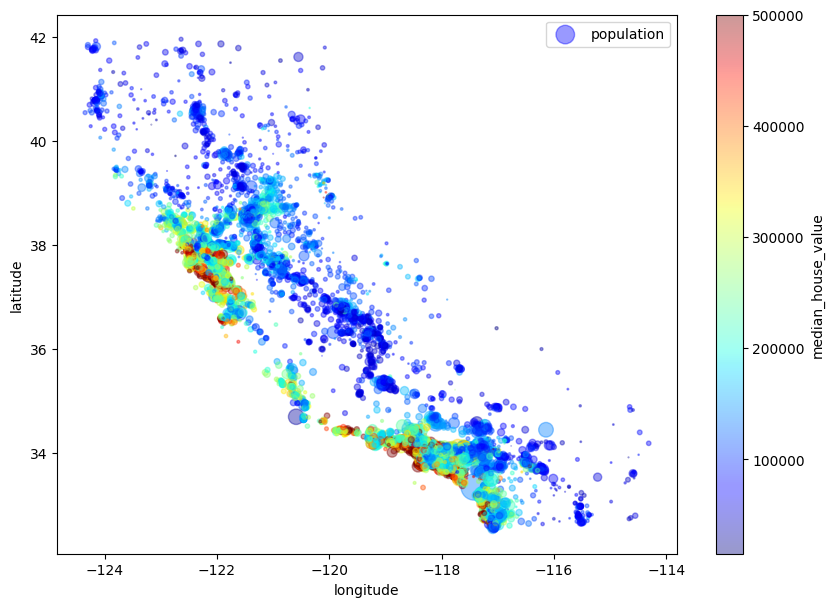

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

# Looking for Correlations

In [29]:
housing.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

In [30]:
housing.drop('income_cat', axis=1, inplace=True)

In [31]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [32]:
corr_matrix = housing.select_dtypes(include=['float64', 'int64']).corr()

In [33]:
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

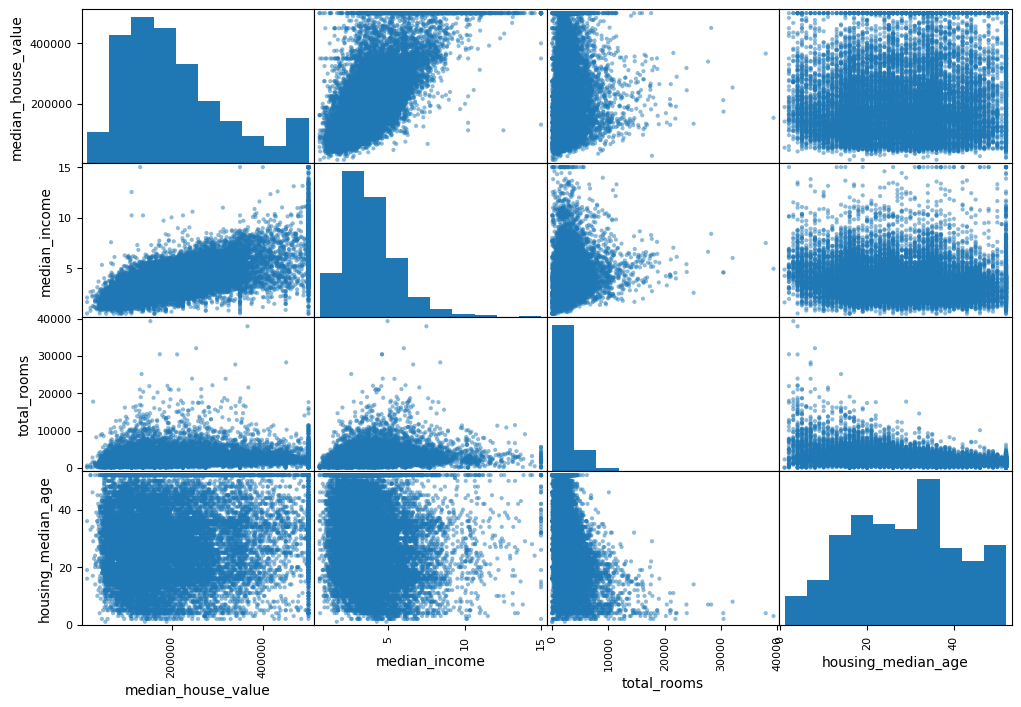

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

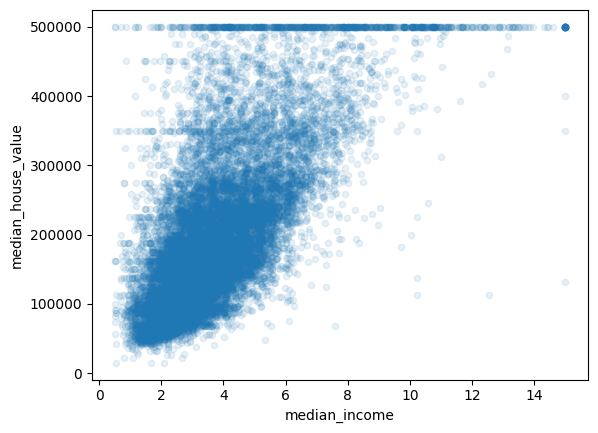

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# Experimenting with Attribute Combinations

In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [38]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
12655          INLAND             5.485836           0.205784   
15502      NEAR OCEAN             6.927083           0.160714   
2908           INLAND             5.393333           0.191595   
14053      NEAR OCEAN             3.886128           0.276505   
20496       <1H OCEAN             6.096552           0.182692   

       population_per_household  
12655                  3.168555  
15502                  2.623698  
2908                   2.223333  
14053                  1.859213  
20496                  3.167241

In [39]:
corr_matrix = housing.select_dtypes(include=['float64', 'int64']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [40]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [41]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

# Data Cleaning

In [42]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

In [43]:
# Guess Missing Numbers
median_bedrooms = housing["total_bedrooms"].median()  # Find middle value  
housing["total_bedrooms"].fillna(median_bedrooms, inplace=True)  

C:\Users\Arshad Ziban\AppData\Local\Temp\ipykernel_17508\1823725051.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median_bedrooms, inplace=True)


In [44]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
income_cat            0
dtype: int64

#  Fixing Missing Values with SimpleImputer 

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
imputer = SimpleImputer(strategy="median") 

In [47]:
#the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity Column
housing_num = housing.drop(["ocean_proximity", "income_cat"], axis=1)

In [48]:
housing_num.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964

In [49]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [50]:
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [51]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [52]:
X = imputer.transform(housing_num)

In [53]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [54]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [55]:
housing_num.tail(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12396    -116.29     33.67                12.0       5048.0           842.0   
16476    -121.27     38.13                35.0       2607.0           685.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
6980     -118.01     33.97                36.0       1451.0           224.0   
5206     -118.28     33.93                41.0        936.0           257.0   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
12396       883.0       391.0         5.6918  
16476      2016.0       618.0         1.7500  
2271        874.0       380.0         3.5542  
6980        608.0       246.0         6.0648  
5206        913.0       226.0         2.0313  
15174      2026.0      1001.0         5.0900  
12661      4769.0      1418.0         2.8139  
19263       458.0       172.0         3.1797  
19140      1208.0       501.0         4.1964  
19773       625.0       197.0         3.1319

# Handling Text and Categorical Attributes

In [56]:
# Use OrdinalEncoder (Simple Numbers)
from sklearn.preprocessing import OrdinalEncoder

# Select the column with text categories
housing_cat = housing[["ocean_proximity"]]

# Convert to numbers
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [57]:
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [58]:
# Use OneHotEncoder (Better Way)

In [59]:
from sklearn.preprocessing import OneHotEncoder